In [27]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
fib_file='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE113nnn/GSE113957/suppl/GSE113957_fpkm.txt.gz'

In [9]:
fib=pd.read_table(fib_file,index_col=0)
fib.shape

(27142, 150)

In [10]:
fib=fib.iloc[:,7:]
fib.shape

(27142, 143)

In [11]:
fib.sum().head(10)

101_19yr_Female_Caucasian         332400.032
102_19yr_Male_Caucasian           318938.278
103_19yr_Male_Caucasian           325873.988
104_19yr_Male_Caucasian           328673.900
105_20yr_Male_Caucasian           322409.524
106_20yr_Female_Caucasian         326903.438
107_31yr_Female_Caucasian         343312.690
108_31_female_Caucasian           324368.230
109_32_male_Unknown               342743.396
110_32_female_BlackPuertoRican    339984.326
dtype: float64

In [15]:
fib=(fib/fib.sum())*10**6
fib.sum().head(10)


101_19yr_Female_Caucasian         1000000.0
102_19yr_Male_Caucasian           1000000.0
103_19yr_Male_Caucasian           1000000.0
104_19yr_Male_Caucasian           1000000.0
105_20yr_Male_Caucasian           1000000.0
106_20yr_Female_Caucasian         1000000.0
107_31yr_Female_Caucasian         1000000.0
108_31_female_Caucasian           1000000.0
109_32_male_Unknown               1000000.0
110_32_female_BlackPuertoRican    1000000.0
dtype: float64

In [16]:
HGPS=['139_8_Female-HGPS_Caucasian','141_8_Male-HGPS_Unknown']
#mos=['197_2yr3mos_F_Unknown','198_3yr9mos_F_Unknown','199_4yr8mos_F_Unknown','200_8yr6mos_M_Unknown','201_6ys11mos_F_Unknown','202_5yr0mos_F_Unknown','203_8yr10mos_M_Unknown','204_3yr0mos_F_Unknown']
fib=fib[[c for c in fib.columns if c not in HGPS]]
fib.shape

(27142, 141)

In [17]:
ages=fib.columns.str.split('_').str[1].str.strip('yr').str.strip('YR').tolist()
ages=[int(a[0]) if 'yr' in a or 'ys' in a else int(a) for a in ages]
fib=fib.T
fib=np.log10(fib+1)
fib['age']=ages

In [25]:
cor=fib.corrwith(fib['age']).dropna().sort_values().drop('age')
cor

Transcript ID
NM_001134231   -0.715569
NM_021076      -0.702928
NM_005439      -0.665704
NM_006755      -0.657171
NM_004547      -0.653315
                  ...   
NM_012106       0.663331
NM_030571       0.669169
NM_001300899    0.672514
NR_028028       0.698433
NM_173647       0.703318
Length: 23186, dtype: float64

In [43]:
fib['age_group']=pd.qcut(fib.age,5)
fl=fib[fib.age<fib.age.quantile(1/5)].mean()
fh=fib[fib.age>fib.age.quantile(4/5)].mean()
fm=fib.median()
df=pd.concat([fl,fm,fh],1)
df.columns=['young','mid','old']
df['log_fold']=df['old']/df['young']

<AxesSubplot:xlabel='age', ylabel='NM_173647'>

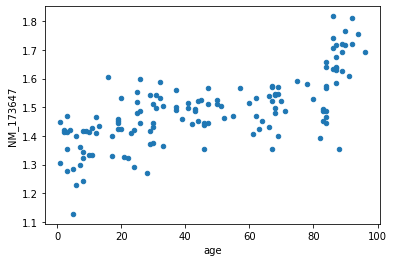

In [44]:
fib.plot.scatter('age','NM_173647')

In [46]:
df.loc[cor.tail(20).index][::-1]

,young,mid,old,log_fold
Transcript ID,,,,
NM_173647,1.371643,1.485713,1.646198,1.200166
NR_028028,1.400996,1.496360,1.616084,1.153525
NM_001300899,1.041330,1.156257,1.324890,1.272306
NM_030571,1.772609,1.844087,2.017574,1.138194
NM_012106,2.028655,2.102743,2.230206,1.099352
NM_147150,2.006383,2.153914,2.362515,1.177499
NM_015194,1.557838,1.946467,2.241403,1.438791
NM_001136562,2.041302,2.190216,2.399364,1.175409
NM_001101801,1.438342,1.530257,1.659095,1.153478


In [49]:
df.loc[cor.tail(20).index][::-1].to_csv('positive.csv')

<AxesSubplot:xlabel='age', ylabel='NM_001134231'>

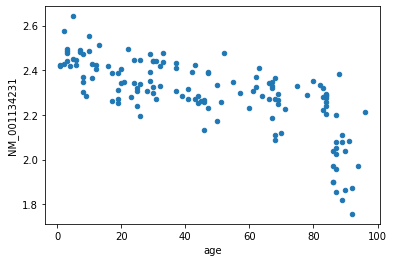

In [47]:
fib.plot.scatter('age','NM_001134231')

In [48]:
df.loc[cor.head(20).index]

,young,mid,old,log_fold
Transcript ID,,,,
NM_001134231,2.445253,2.317493,2.071843,0.847292
NM_021076,0.521906,0.288972,0.092527,0.177287
NM_005439,2.549954,2.489753,2.421418,0.949593
NM_006755,2.403321,2.317446,2.173318,0.904298
NM_004547,2.351086,2.260166,2.158627,0.918140
NM_000852,2.837332,2.727442,2.548321,0.898140
NM_001284368,2.408022,2.342002,2.260420,0.938704
NM_016404,2.084944,2.009487,1.936857,0.928973
NM_152742,0.406627,0.272731,0.133605,0.328569


In [50]:
df.loc[cor.head(20).index].to_csv('negative.csv')